Importando as pacotes

In [71]:
#Técnica de Aprendizado de Maquina Utilizado: 
import pandas as pd

Lendo os arquivos

In [72]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
try:
  df_orders = pd.read_csv('dataset/olist_orders_dataset.csv.zip', compression='zip')
  df_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv.zip', compression='zip')
  df_customers = pd.read_csv('dataset/olist_customers_dataset.csv.zip', compression='zip')
  df_geolocation = pd.read_csv('dataset/olist_geolocation_dataset.csv.zip', compression='zip')
  df_items = pd.read_csv('dataset/olist_order_items_dataset.csv.zip', compression='zip')
  df_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv.zip', compression='zip')
  df_products = pd.read_csv('dataset/olist_products_dataset.csv.zip', compression='zip')
except:
  df_orders = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_orders_dataset.csv.zip', compression='zip')
  df_reviews = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_order_reviews_dataset.csv.zip', compression='zip')
  df_customers = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_customers_dataset.csv.zip', compression='zip')
  df_geolocation = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_geolocation_dataset.csv.zip', compression='zip')
  df_items = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_order_items_dataset.csv.zip', compression='zip')
  df_payments = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_order_payments_dataset.csv.zip', compression='zip')
  df_products = pd.read_csv('drive/MyDrive/Code/cct/dataset/olist_products_dataset.csv.zip', compression='zip')

Verificando os tipos

In [74]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [75]:
df_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Tratando as datas

In [76]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [77]:
df_geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [78]:
df_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [79]:
df_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [80]:

df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [81]:
#Tratando bases
#Base de Orders
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], format = '%Y/%m/%d %H:%M:%S.%f')
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"], format = '%Y/%m/%d').dt.date

#Base de Reviews
df_reviews["review_creation_date"] = pd.to_datetime(df_reviews["review_creation_date"], format = '%Y/%m/%d').dt.date
df_reviews['review_answer_timestamp'] = pd.to_datetime(df_reviews['review_answer_timestamp'], format = '%Y/%m/%d %H:%M:%S.%f')

#Abrindo por datas
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

In [82]:
#Juntando os datasets
df_orders = pd.merge(df_orders, df_reviews, how = 'left', on = 'order_id')
df_orders = pd.merge(df_orders, df_items, how = 'left', on = 'order_id')
df_orders = pd.merge(df_orders, df_payments, how = 'left', on = 'order_id')
df_orders = pd.merge(df_orders, df_products, how = 'left', on = 'product_id')

In [83]:
#Valores Ausentes
df_orders.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
order_purchase_year              False
order_purchase_month             False
order_purchase_month_name        False
order_purchase_year_month        False
order_purchase_date              False
order_purchase_day               False
order_purchase_dayofweek         False
order_purchase_dayofweek_name    False
order_purchase_hour              False
order_purchase_time_day          False
review_id                         True
review_score                      True
review_comment_title              True
review_comment_message            True
review_creation_date              True
review_answer_timestamp           True
order_item_id                     True
product_id               

In [84]:
from scipy import stats 
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    #summary['First Value'] = df.loc[0].values
    #summary['Second Value'] = df.loc[1].values
    #summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [85]:
resumetable(df_orders)

Dataset Shape: (119143, 42)


,Name,dtypes,Missing,Uniques,Entropy
0,order_id,object,0,99441,16.46
1,customer_id,object,0,99441,16.46
2,order_status,object,0,8,0.25
3,order_purchase_timestamp,datetime64[ns],0,98875,16.44
4,order_approved_at,datetime64[ns],177,90733,16.28
5,order_delivered_carrier_date,datetime64[ns],2086,81018,16.03
6,order_delivered_customer_date,datetime64[ns],3421,95664,16.40
7,order_estimated_delivery_date,object,0,459,8.47
8,order_purchase_year,int64,0,3,1.02
9,order_purchase_month,int64,0,12,3.53


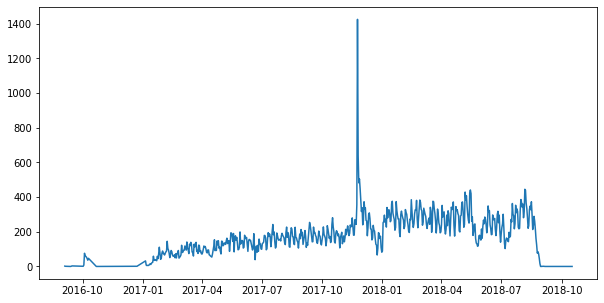

<Figure size 7200x144 with 0 Axes>

In [86]:
#Outliers
import matplotlib.pyplot as plt
###
##
#

#df_view = order_items #pd.merge(order_items,orders,how='inner',on='order_id')
#df_view.head()
#df_view = pd.merge(df_view,customers,how='inner',on='customer_unique_id')
df_view = df_orders.copy()
df_view['order_purchase_timestamp'] = pd.to_datetime(df_view['order_purchase_timestamp'])
df_view['yearmonth'] = df_view['order_purchase_timestamp'].dt.year*100 + df_view['order_purchase_timestamp'].dt.month


agg = df_view
agg.head()
agg['order_purchase_timestamp'] = pd.to_datetime(agg['order_purchase_timestamp'])
agg['o_date'] = agg['order_purchase_timestamp'].dt.date

agg = agg.groupby('o_date').agg({'order_item_id': 'count','price':'sum','customer_id': lambda x: x.nunique(),'seller_id': lambda x: x.nunique(),})
agg.columns = ['sales_count','sales_sum','customer_count','sellers_count']
agg.reset_index(inplace=True)
agg['MeanSale'] = round(agg['sales_sum'] / agg['sales_count'],2)

plt.plot(agg['o_date'], agg['sales_count'])
plt.figure(figsize=(100,2))
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [87]:
df_orders['product_category_name'].value_counts()

cama_mesa_banho                                  11988
beleza_saude                                     10032
esporte_lazer                                     9004
moveis_decoracao                                  8832
informatica_acessorios                            8150
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: product_category_name, Length: 73, dtype: int64

In [95]:
category = 'cama_mesa_banho'
df_predicter = df_orders[df_orders['product_category_name'] == category]


In [96]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name=category,
    x = df_predicter.order_purchase_timestamp, 
    y = df_predicter.payment_value,
    mode='lines'
    ))

fig.update_layout(
    title= (f'Evolução das vendas de {category} no tempo'),
    template='plotly_dark',
    yaxis_title='Vendas [BRL]')

fig.show()

In [90]:
#Dados Categóricos

In [91]:
#Valor do produto e frete por data
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import colorlover as cl
# Others
import warnings
# Product value by date
df_orders['datetime'] =  pd.to_datetime(df_orders['order_purchase_timestamp'])
value_date = df_orders.groupby([df_orders['datetime'].dt.date])['price'].sum()
freight_date = df_orders.groupby([df_orders['datetime'].dt.date])['freight_value'].sum()
# Plot timeseries
trace0 = go.Scatter(x=value_date.index.astype(str), y=value_date.values, opacity = 0.8, name='Product value')
trace1 = go.Scatter(x=freight_date.index.astype(str), y=freight_date.values, opacity = 0.8, name='Freight value')
layout = dict(
    title= "Product and freight value by date",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='12m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)
fig = dict(data= [trace0, trace1], layout=layout)
iplot(fig)

# Sales for month
value_month = df_orders[['datetime', 'price']].copy()
value_month.set_index('datetime', inplace=True)
value_month = value_month.groupby(pd.Grouper(freq="M"))['price'].sum()
trace = go.Bar(x= value_month.index, y= value_month.values)
layout = go.Layout(title='Sales per month (product value)', height=420, width=800)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [92]:
#Funções Plot graficos
import seaborn as sns
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]
    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    # Verificando a plotagem de top categorias
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    # Validando demais argumentos e plotando gráfico
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    # Formatando eixos
    format_spines(ax, right_border=False)

    # Inserindo rótulo de percentual
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



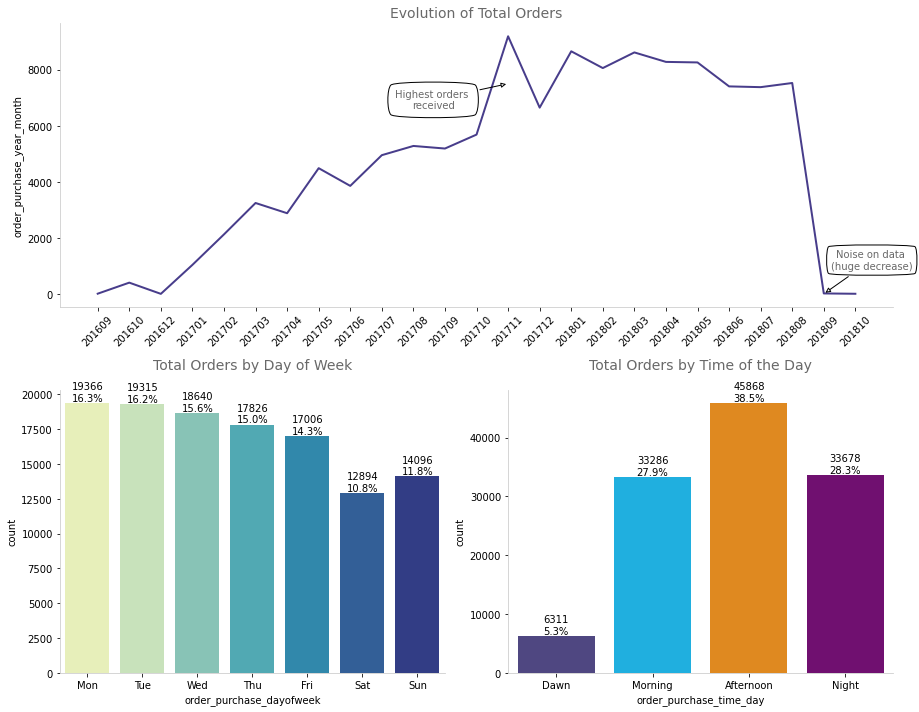

In [93]:
#Evolução do total de pedidos
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(df_orders, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(df_orders, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

In [94]:
import seaborn as sns
plt.figure(figsize=(14,8))

sns.countplot(master_df_with_product_categories.product_category_name_english,#
              order=master_df_with_product_categories.product_category_name_english.value_counts().index)

plt.title('What is the most in demand product category?'.title(), fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('product category'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize=10);
plt.yticks(fontsize=12)
plt.show()

NameError: ignored

<Figure size 1008x576 with 0 Axes>

In [ ]:
df_orders.product_category_name.value_counts()

In [ ]:
df_orders.product_id.nunique()

In [ ]:
df_orders[df_orders.product_id == '99a4788cb24856965c36a24e339b6058'].product_category_name

In [ ]:
df_orders.product_id.value_counts()

In [ ]:
df_orders.columns

In [ ]:
df_params = df_orders.copy()
df_params = df_params.drop(['customer_id',
                            'order_id',
                            'order_item_id',
                            'product_id',
                            'product_description_lenght',
                            'product_weight_g',
                            'product_length_cm',
                            'product_height_cm',
                            'product_width_cm',
                            'order_approved_at',
                            'order_status',
                            'shipping_limit_date',
                            'order_delivered_carrier_date',
                            'order_delivered_customer_date',
                            'order_estimated_delivery_date'                         
                            ], axis=1)


In [ ]:
df_params.shape

In [ ]:
# excluding lines with missing data
df_params = df_params.dropna()

#excluding duplicated data
df_params = df_params.drop_duplicates().reset_index()

In [ ]:
df_params.shape

In [ ]:
df_predict = df_params.copy()

In [ ]:
2from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_predict[[#freq,
                'price', 'freight_value', 'product_name_lenght', 'product_photos_qty', 'estimated_delivery_time']],
    df_predict['payment_value'],
     test_size=0.2, random_state=42, shuffle=False)

#X, y = df_predict[freq], df_predict.payment_value

In [ ]:
#Definindo Variaveis para o Treinamento
#primeiro, descartamos as colunas irrelevantes
param_df=merge_df.drop(['customer_id',
                        'customer_unique_id',
                        'order_id',
                        'order_purchase_timestamp',
                        'customer_city',
                        'order_delivered_customer_date',
                        'order_estimated_delivery_date',
                        'product_id'],axis=1)

param_df=param_df[param_df['order_status'].str.contains('delivered')]

df_intermediate = df_complete.drop(['order_id',
                                 'order_item_id',
                                 'customer_id',
                                 'shipping_limit_date',
                                 'product_description_lenght',
                                 'product_weight_g',
                                 'product_length_cm',
                                 'product_height_cm',
                                 'product_width_cm',
                                 'order_approved_at',
                                 'order_delivered_carrier_date',
                                 'order_delivered_customer_date',
                                 'order_estimated_delivery_date',
                                 'order_status'], axis=1)

df_intermediate.tail()

#criamos novos recursos, bem como o primeiro valor-alvo 'tempo de entrega'
param_df['product_volume_cm3']=param_df['product_length_cm']*param_df['product_height_cm']*param_df['product_width_cm']
param_df['delivery_time']=(merge_df['order_delivered_customer_date']-merge_df['order_purchase_timestamp']).dt.days
param_df=param_df.drop(['order_status','product_length_cm','product_height_cm','product_width_cm'], axis=1)

param_df.columns

In [ ]:
#Tratando Variveis do Treinamento

In [ ]:
#Treinando o modelo